In [1]:
import os
import sys
import import_ipynb
import pandas as pd
import numpy as np
#local lib
sys.path.insert(0, os.path.abspath('../KindScoreModel'))
import KindScore as ks
import SpeechRecognition as sr

importing Jupyter notebook from KindScore.ipynb
importing Jupyter notebook from SpeechRecognition.ipynb
Set minimum energy threshold to 462.45534669145906


### Read data source

In [2]:
df = pd.read_csv("data/dataset/dataReV5.csv")
df

,Vehicle,restaurant,food delivery,Problem,score,work,เวลาในการรออาหาร,ราคาอาหาร
0,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",Promotions,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,1 - 2 ชั่วโมง,10 นาทีขึ้นไป,51-100บาท
1,รถยนต์ส่วนตัว,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",หิว ขี้เกียจเดิน จะทำงาน,ไม่มีอะไรน่ากิน,3.0,2 - 3 ชั่วโมง,6 - 10 นาที,51-100บาท
2,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวราดแกง, ร้านน้ำ,...",เพราะร้านที่อยากกินอยู่ไกล บางทีก็อยู่ในเวลาเร...,ถ้าคิวยาวก็ไม่ซื้อ,8.6,1 - 2 ชั่วโมง,6 - 10 นาที,100-200 บาท
3,เดิน,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวราดแกง, ร้านน้ำ,...",ขี้เกียจเดินออกไปกินข้างนอก,ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น,7.8,1 - 2 ชั่วโมง,6 - 10 นาที,300-500 บาท
4,รถประจำทาง,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",อยากกินร้านนั้น,ถ้าแถวยาวมากก็จะขี้เกียจรอ,8.0,1 - 2 ชั่วโมง,10 นาทีขึ้นไป,100-200 บาท
...,...,...,...,...,...,...,...,...
64,รถจักรยานยนต์,ร้านอาหารญี่ปุ่น,ไม่ต้องต่อคิวซื้อเอง,ร้านไม่เปิดในช่วงปิดเทอม,5.2,NaN,10-20 นาที,40-80บาท
65,รถยนต์ส่วนตัว,"ก๋วยเตี๋ยว, อาหารตามสั่ง, ข้าวมันไก่, ข้าวราดแ...",หิวเมื่อไหรก็สั่งได้,คนเยอะรอคิวนาน,8.4,NaN,5-15 นาที,30-150บาท
66,รถยนต์ส่วนตัว,ร้านข้าวต้มปลา,มีอาหารที่หลากหลาย,ไม่อยากไปต่อแถว,8.0,NaN,2-3 นาที,20-100บาท
67,เดิน,ร้านส้มตำ,มีโปรโมชั่นเยอะ,ไม่อยากกินอาหารที่ขายอยู่,4.4,NaN,10-15 นาที,50-70บาท


### Algorithm KindScore

Optimal Cluster Number:  5


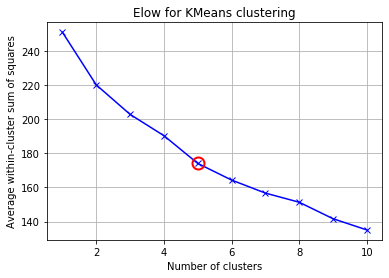

KindScore.ipynb:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  "outputs": [],


In [3]:
data, model = ks.KindScoreModel(df,"Problem","score")

In [27]:
problemList =  []

### file wav
problemList.append(sr.FileRecognition("/Users/fluke/Documents/RE/RE_Project/data/sound/01.wav",15))
problemList.append(sr.FileRecognition("/Users/fluke/Documents/RE/RE_Project/data/sound/02.wav",15))
# problemList.append(sr.FileRecognition("C:/Users/Pack.Apichart/Desktop/Re_project/Cluster_speech_two/data/sound/02.wav",15))
# problemList.append(sr.FileRecognition("C:/Users/Pack.Apichart/Desktop/Re_project/Cluster_speech_two/data/sound/03.wav",15))
# problemList.append(sr.FileRecognition("C:/Users/Pack.Apichart/Desktop/Re_project/Cluster_speech_two/data/sound/04.wav",15))

### said problem
# problemList.append(sr.SpeechRecognition("speech"))

problemList.append("ถ้าคนเยอะก็ไม่อยากไปต่อคิว")
problemList.append("ปัญหาอหกดฟหกดฟหดอ้ย")
problemList.append("ปัญหาอหasfsadt4w5e sadfดอ้ย")
problemList.append("ปัญหาอหกด79874 ดอ้ย")
problemList.append("ไม่อยากกินอาหารที่ขายอยู่")
# ปัญหาด้านกลิ่นด้าน

### file wav V2
### Step one : call SpeechRecognition("file") 
### Step two : input path file [only type String]
### Step tree :input second to recognitions [only type Integer]
# problemList.append(sr.SpeechRecognition("file"))

# x = sr.problem_CSV(pd.read_csv("data/dataReV6987.csv"), "Problem")

Processing !!
You said: มันก็แบบที่หน้าโรงอาหารครับผมก็เลยว่าการรอคิวนี้มันมีหลายคิวแล้วก็ใช้เวลาในการทำนาถ้าเราสั่งมาได้มันก็จะง่ายนี้ราคามันก็ไม่รับพร้อมเพย์เงินกู้มีตู้เดียว
Processing !!
You said: ปัญหาจากโรงอาหารคณะไอทีน้าก็อย่างที่เธอก็คือว่าแบบบางร้านอาหารนะเพราะผัดอาหารก็จะมีควันออกมาซึ่งนี่เป็นคนไม่ค่อยชอบฟันกินอาหารเพราะมันจะติดตัวแบบนี้แล้วก็บางทีอ่ะเพราะโรงอาหารคนเยอะช่วงเที่ยงตรงกลางมันร้อนแดดมันส่องอื่นก็ร้อนก็นั่งไม่ได้แล้วอาหารบางทีสมมุติถ้าเลิกช้าๆก็ไม่มีข้าวกินแล้วก็ต้องไปกินข้าวที่โรงอาหารอื่นประมาณนี้


### Weight score new problem in same cluster and wirte file csv

In [6]:
data

,Problem,score,cluster
0,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,0
1,ไม่มีอะไรน่ากิน,3.0,3
2,ถ้าคิวยาวก็ไม่ซื้อ,8.6,0
3,ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น,7.8,0
4,ถ้าแถวยาวมากก็จะขี้เกียจรอ,8.0,0
...,...,...,...
64,ร้านไม่เปิดในช่วงปิดเทอม,5.2,3
65,คนเยอะรอคิวนาน,8.4,0
66,ไม่อยากไปต่อแถว,8.0,0
67,ไม่อยากกินอาหารที่ขายอยู่,4.4,1


In [7]:
# data.loc[data["cluster"]== 0]

In [8]:
# data.loc[data["cluster"]== 1]

In [9]:
# data.loc[data["cluster"]== 2]

In [10]:
# data.loc[data["cluster"]== 3]

In [11]:
# data.loc[data["cluster"]== 4]


<hr size="3" />

<h1> Weigth The importance of the problem by similarity in same cluster problem</h1>

### conditions 1
* similarity > 0.7  in cluster |

### conditions 2
* similarity > 0.7  in nor cluster|

### conditions 3
* similarity < 0.7   write problem not match |

### Tips use the  ks.Weightscore
### ks.Weightscore(a, b, c, d, e)
<label>a = Path want to save Problem matching in dataset</label><br>
<label>b = List new problem</label><br>
<label>c = dataset | it must has featue cluster</label><br>
<label>d = model | after train in kindscore algorithm</label><br>
<label>e Path want to savePath Problem not matching in dataset</label><br>

In [28]:
# Weightscore("data/dataReVXXX",problemList,data,model,"data/dataNotmatt")
dataset, cluster_newProblem = ks.Weightscore("data/dataReVXXX",problemList,data,model,"data/dataNotmatt")

มันก็แบบที่หน้าโรงอาหารครับผมก็เลยว่าการรอคิวนี้มันมีหลายคิวแล้วก็ใช้เวลาในการทำนาถ้าเราสั่งมาได้มันก็จะง่ายนี้ราคามันก็ไม่รับพร้อมเพย์เงินกู้มีตู้เดียว 7.8 0.7927828705354746 ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น
state_similarity >= 0.7 || 1


/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


ปัญหาจากโรงอาหารคณะไอทีน้าก็อย่างที่เธอก็คือว่าแบบบางร้านอาหารนะเพราะผัดอาหารก็จะมีควันออกมาซึ่งนี่เป็นคนไม่ค่อยชอบฟันกินอาหารเพราะมันจะติดตัวแบบนี้แล้วก็บางทีอ่ะเพราะโรงอาหารคนเยอะช่วงเที่ยงตรงกลางมันร้อนแดดมันส่องอื่นก็ร้อนก็นั่งไม่ได้แล้วอาหารบางทีสมมุติถ้าเลิกช้าๆก็ไม่มีข้าวกินแล้วก็ต้องมากินข้าวที่โรงอาหารอื่นประมาณนี้ 7.8 0.9133277660506629 มันก็แบบที่หน้าโรงอาหารครับผมก็เลยว่าการรอคิวนี้มันมีหลายคิวแล้วก็ใช้เวลาในการทำนาถ้าเราสั่งมาได้มันก็จะง่ายนี้ราคามันก็ไม่รับพร้อมเพย์เงินกู้มีตู้เดียว
state_similarity >= 0.7 || 1


/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


ถ้าคนเยอะก็ไม่อยากไปต่อคิว 9.0 1.0000000000000007 ถ้าคนเยอะก็ไม่อยากไปต่อคิว
state_similarity >= 0.7 || 1
ปัญหาอหกดฟหกดฟหดอ้ย 8.8 0.2529638999214011 โดนลัดคิว
state_similarity <= 0.7
ปัญหาอหasfsadt4w5e sadfดอ้ย 6.6 0.21749691288352757 ร้านอาหารมีจำนวนไม่มากพอที่จะรับจำนวนนักศึกษา
state_similarity <= 0.7
ปัญหาอหกด79874 ดอ้ย 8.8 0.25296389992140117 โดนลัดคิว
state_similarity <= 0.7
ไม่อยากกินอาหารที่ขายอยู่ 4.4 1.0000000000000002 ไม่อยากกินอาหารที่ขายอยู่
state_similarity >= 0.7 || 1


In [29]:
dataset

,Problem,score,cluster
0,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,0
1,ไม่มีอะไรน่ากิน,3.0,3
2,ถ้าคิวยาวก็ไม่ซื้อ,8.6,0
3,ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น,7.8,0
4,ถ้าแถวยาวมากก็จะขี้เกียจรอ,8.0,0
...,...,...,...
70,ถ้าคนเยอะ ก็ไม่ต่อคิว,9.0,0
71,ถ้าคนเยอะก็ไม่อn ยากไปต่อคิว,9.0,0
72,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,0
73,มันก็แบบที่หน้าโรงอาหารครับผมก็เลยว่าการรอคิวน...,7.8,0


In [16]:
dataset

,Problem,score,cluster
0,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,0
1,ไม่มีอะไรน่ากิน,3.0,3
2,ถ้าคิวยาวก็ไม่ซื้อ,8.6,0
3,ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น,7.8,0
4,ถ้าแถวยาวมากก็จะขี้เกียจรอ,8.0,0
...,...,...,...
68,อาหารเหลือแต่ร้านที่ไม่อร่อย,5.2,4
69,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,0
70,ถ้าคนเยอะ ก็ไม่ต่อคิว,9.0,0
71,ถ้าคนเยอะก็ไม่อn ยากไปต่อคิว,9.0,0


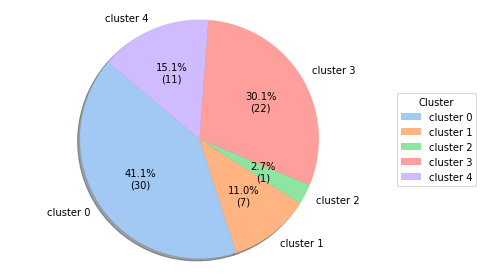

,Problem,score,cluster
0,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,0
1,ไม่มีอะไรน่ากิน,3.0,3
2,ถ้าคิวยาวก็ไม่ซื้อ,8.6,0
3,ถ้าร้านนั้นคนเยอะก็จะไปเลือกร้านอื่น,7.8,0
4,ถ้าแถวยาวมากก็จะขี้เกียจรอ,8.0,0
...,...,...,...
68,อาหารเหลือแต่ร้านที่ไม่อร่อย,5.2,4
69,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,0
70,ถ้าคนเยอะ ก็ไม่ต่อคิว,9.0,0
71,ถ้าคนเยอะก็ไม่อn ยากไปต่อคิว,9.0,0


In [17]:
ks.pieplot(dataset)

dataset

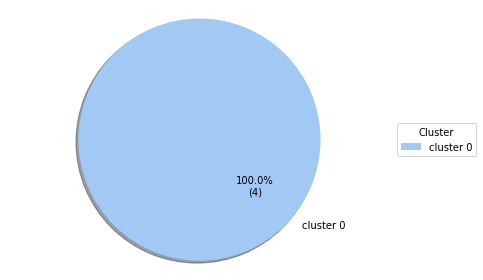

,Problem,score,cluster
0,ถ้าคนเยอะ ก็ไม่ต่อคิว,9.0,0
1,ถ้าคนเยอะก็ไม่อn ยากไปต่อคิว,9.0,0
2,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,0
3,ถ้าคนเยอะก็ไม่อยากไปต่อคิว,9.0,0


In [18]:
ks.pieplot(cluster_newProblem)

cluster_newProblem